##### Author: Byron Pineda

####  Project 1 
This part of the team project examined if Covid vaccinations administered had a relationship with the reduction of unemployment numbers in the US.  The number of Covid vaccinations administered was used for this study and not the amount delivered. The reason for using the administered vaccinations numbers is even though there were more vaccines delivered if they were not administered then those had no impact. This data was sourced from the Center for Disease Control. 

A common theme we have heard from our government and health officials almost on a regular basis about Covid-19 is that "getting shots in the arms" would be a key to getting back to normalcy, reducing transmission rate, reducing death rates, and getting our economy back on track. Simply getting vaccinated alone would not end the pandemic but would be one of the measures to reduce the impact it has had on our lives and economy. 

Other measures clearly played a more immediate role in improving the unemployment rates since April 2020 such as the three rounds of economic stimulus checks, employees working remotely instead of being laid off, companies/businesses adapting their business models and other things going beyond this study.  If we look at the unemployment rates in the US in April when our unemployment rate peaked at over 14, you will a drastic reduction of unemployment rate to around 8 by August. Since data for vaccination administered were not available until 2020 other factors played a key role in the reduction of unemployment.

A closer look at unemployment rate versus vaccination rates for December 2020 - June 2021.
The graph below represents a closer look at unemployment rate versus vaccinations administered. In this case only data from December 2020 through June 2021 was used to give us a magnified view of a crucial period when vaccinations started being administered and how unemployment was affected. On the upper right-hand side I added in annotation to give a sense of what the number of jobs grew/reduced for each month as small percentage in changes to unemployment rates might not seem like much. Also the annotation above the vaccines (x-axis) lets you know which month it is associated with. For example, the difference in number of jobs added between January 21 and March 2021 was approximately 1.12 million additions and difference between April 2021 - May 2021 was an addition of approximately 940K. So, although these may look like insignificant reductions in unemployment rate the difference can account for a lot of job additions. In some cases the difference between December 2020 and January 2021 lost about 700K jobs but shows a reduction of unemployment rate. Part of this may be employees no longer being considered as unemployeed because of a voluntary decision not to return to work. The plot shows in general that as vaccinations increased so did the rate of unemployment. There was a slight rate of unemployment increasing from 6.0 to 6.1 percent between March 2021 and April 2021 even though the jobs increased by approximately 800K. From May 2021 to June 2021 there was an increase of about 580K, jobs but the unemployment rate jumped from 5.8 to 5.9 percent.

When we created the scatter plot and computed the Pearson correlation coefficient between "Unemployment Rates" and "Vaccines Administered" it produced a negative or inverse correlation of -86 which is a strong indicator of a relationship between those two variables. That negative correlation describes a relationship between two variables that move in opposing directions. Or you can think of this as one variable increased (vaccines administered), then the value of the other variable (unemployment rates) decreased. In this case, as more Covid vaccinations were administered there was a decrease in the unemployment rate.

Remember correlation does not imply causality even if there is a strong correlation between the two variables! The correlation coefficient simply represents the degree of association between two sets of measurements. 

Let us look at linear regression and R-squared now. In general, higher R-squared values represent smaller differences between the observed and fitted values. In this analysis the R-squared was 0.75 indicating a fairly strong relationship. The p-value obtained here is 0.0120998 which is well below the standard <.05. If we obtained a large p-value, it would suggest that changes in the predictor (vaccinations administered) are not associated with changes in the response (unemployment rate). However, in this case the small p-value equates to changes in the predictor value (vaccinations administered) are related to changes in the response variable (unemployment rates). At least mathematically there looks to be a statistically significant relationship between the number of vaccinations administered and unemployment rates. 


In [29]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [30]:
# Names of the CSV file used for this analysis.
vac_admin = 'Data/BCP/Covid Administered Vaccinations in US and States remediated file.csv'
unempl = 'Data/BCP/unemployment rate in US.csv'

In [31]:
vacc_admin_us = pd.read_csv(vac_admin)
unempl_us = pd.read_csv(unempl)

The vaccination file from the CDC required a great amount of cleanup. Excel was used to study the file, build PivotTables and charts, in order to determine how government totals were calculated. Those vaccination records were based on their Morbid and Mortality Weekly Reports collection. Their week starts on Sunday and ends on Saturday. Those records had to be reconcilled to a monthly basis for our other reporting data from BLS which uses monthly totals.  Part of the problem working with their weekly numbers is that when you get to a certain week it may contain part of prior week.  For example, when you look at April you see the last week of March's data as part of that weekly accumulation. The file was remediated from almost 14,000 records to about 250 records. A screen grab of some of the analysis cleanup in Excel.

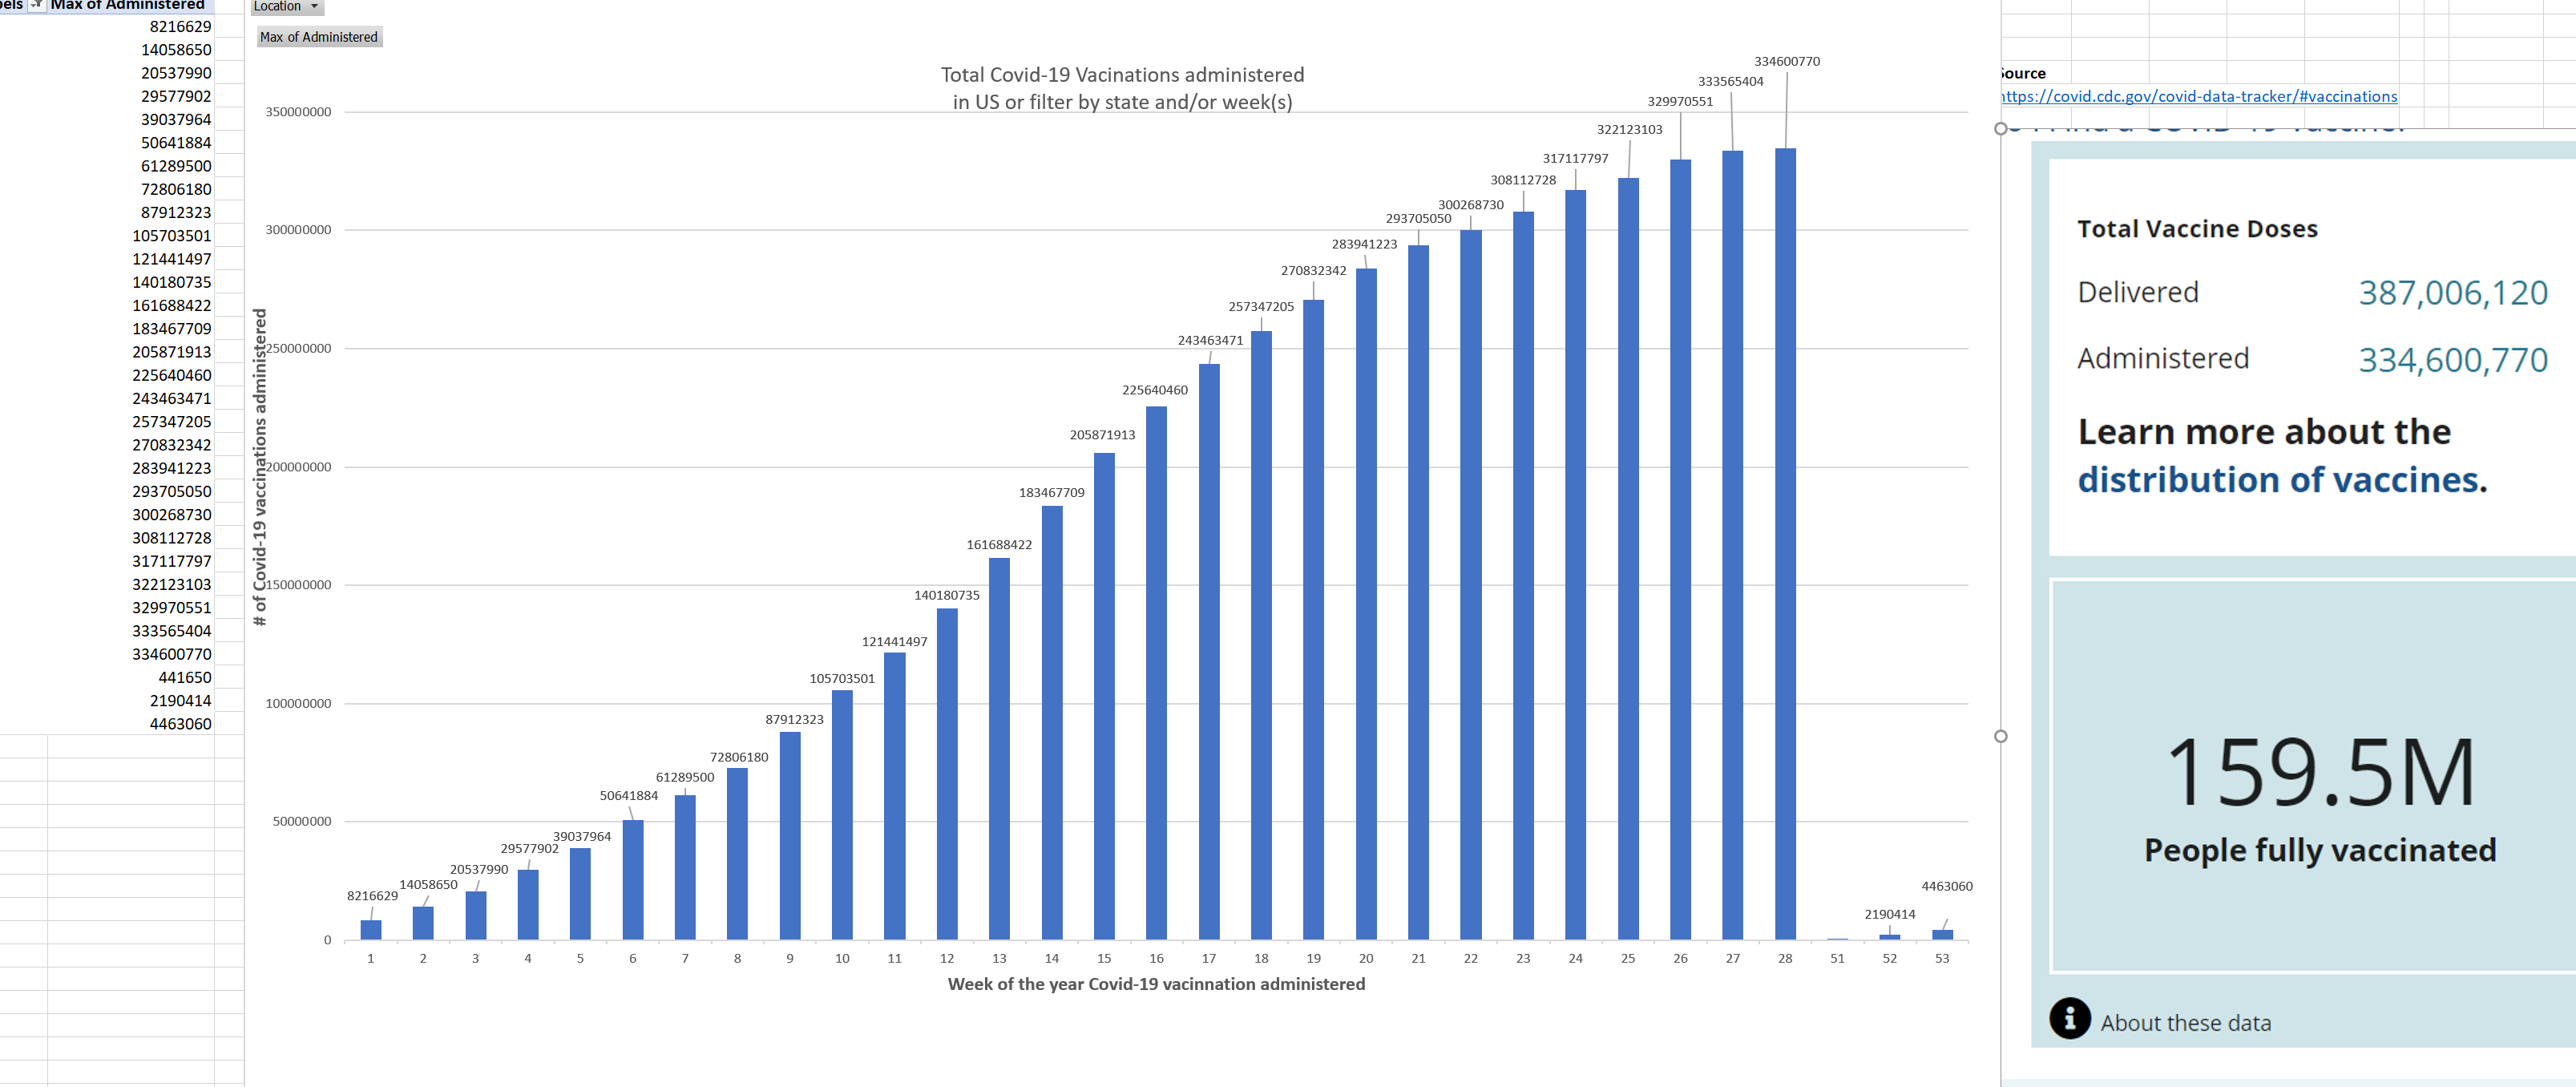

The unemployment data file for the US had to be manually transformed in Excel and saved as a *csv file.

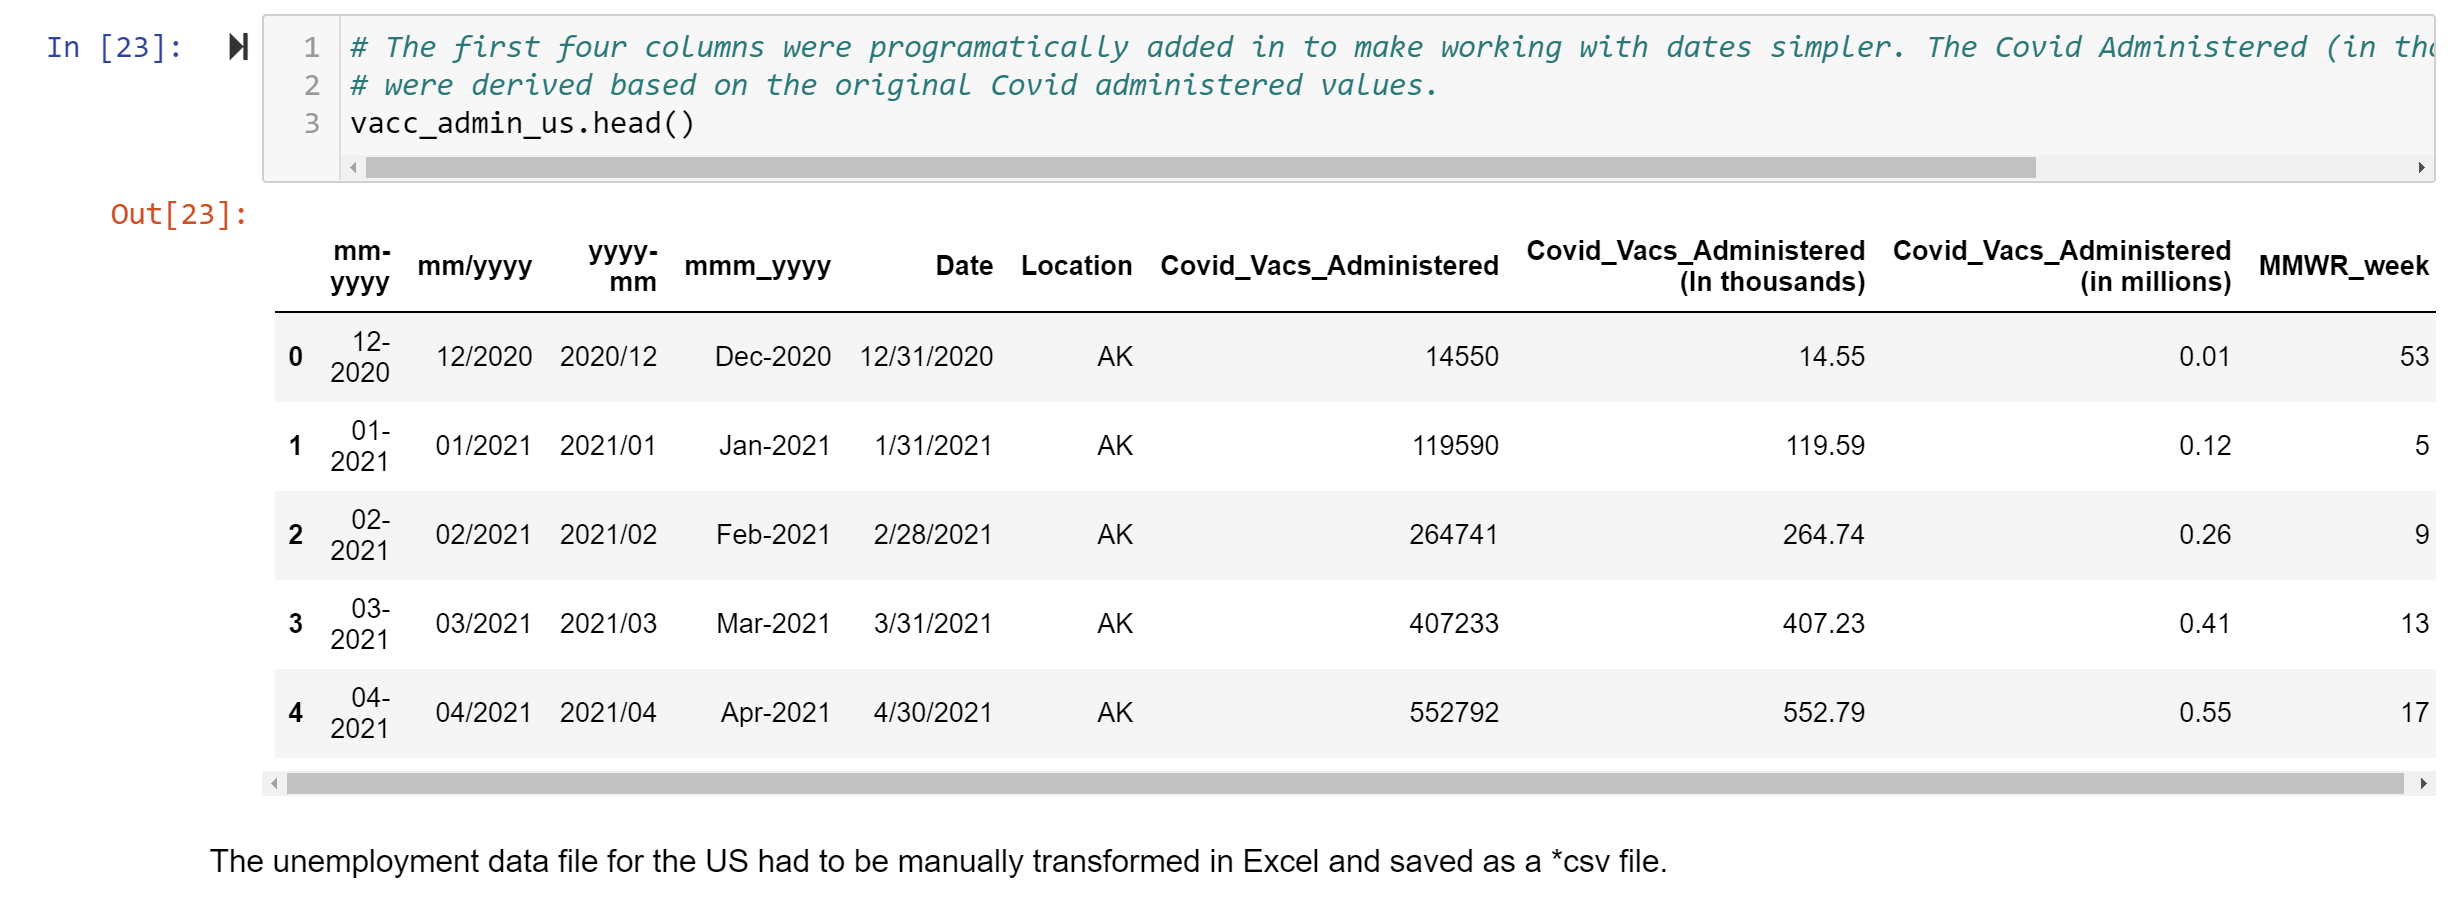

In [32]:
unempl_us.head()

,Month Year,Unemployment Rate US
0,Jan-20,3.5
1,Feb-20,3.5
2,Mar-20,4.4
3,Apr-20,14.8
4,May-20,13.3


In [33]:
# Get the x axis values for the Unemployment plot.
x_axis2 = unempl_us["Month Year"] 

In [34]:
# Get the y axis values for the Unemployment plot.
y_axis2 = unempl_us["Unemployment Rate US"]

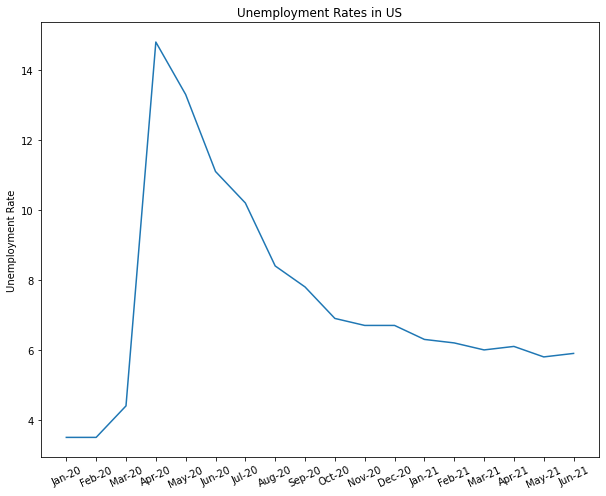

<Figure size 432x288 with 0 Axes>

In [35]:
# Create the unemployment rates in US for viewing and analysis.
plt.subplots(figsize=(10,8))
plt.plot(x_axis2,y_axis2)
plt.title("Unemployment Rates in US", fontsize=12)
plt.ylabel("Unemployment Rate", fontsize=10)
plt.xticks(fontsize=10, rotation='25')

plt.savefig("Images/BCP/Unemployment Rates line graph in US.png")
#plt.legend()
plt.show()
plt.tight_layout()

In [36]:
# The vaccination file that was remediated for analysis described earlier.
vacc_admin_us.head()

,mm-yyyy,mm/yyyy,yyyy-mm,mmm_yyyy,Date,Location,Covid_Vacs_Administered,Covid_Vacs_Administered (In thousands),Covid_Vacs_Administered (in millions),MMWR_week
0,12-2020,12/2020,2020/12,Dec-2020,12/31/2020,AK,14550,14.55,0.01,53
1,01-2021,01/2021,2021/01,Jan-2021,1/31/2021,AK,119590,119.59,0.12,5
2,02-2021,02/2021,2021/02,Feb-2021,2/28/2021,AK,264741,264.74,0.26,9
3,03-2021,03/2021,2021/03,Mar-2021,3/31/2021,AK,407233,407.23,0.41,13
4,04-2021,04/2021,2021/04,Apr-2021,4/30/2021,AK,552792,552.79,0.55,17


In [37]:
# Get the "US" location only.
us_location = vacc_admin_us.loc[vacc_admin_us["Location"] == "US"]
us_location.head(10)

,mm-yyyy,mm/yyyy,yyyy-mm,mmm_yyyy,Date,Location,Covid_Vacs_Administered,Covid_Vacs_Administered (In thousands),Covid_Vacs_Administered (in millions),MMWR_week
440,12-2020,12/2020,2020/12,Dec-2020,12/31/2020,US,3738130,3738.13,3.74,53
441,01-2021,01/2021,2021/01,Jan-2021,1/31/2021,US,31123299,31123.30,31.12,5
442,02-2021,02/2021,2021/02,Feb-2021,2/28/2021,US,75236003,75236.00,75.24,9
443,03-2021,03/2021,2021/03,Mar-2021,3/31/2021,US,150273292,150273.29,150.27,13
444,04-2021,04/2021,2021/04,Apr-2021,4/30/2021,US,240159677,240159.68,240.16,17
445,05-2021,05/2021,2021/05,May-2021,5/31/2021,US,295891325,295891.33,295.89,22
446,06-2021,06/2021,2021/06,Jun-2021,6/30/2021,US,326521526,326521.53,326.52,26
447,07-2021,07/2021,2021/07,Jul-2021,7/12/2021,US,334600770,334600.77,334.60,28


In [38]:
# Get the date element of the "US" location for the x-axis.
x_axis1 = us_location["mmm_yyyy"]
x_axis1

440    Dec-2020
441    Jan-2021
442    Feb-2021
443    Mar-2021
444    Apr-2021
445    May-2021
446    Jun-2021
447    Jul-2021
Name: mmm_yyyy, dtype: object

In [39]:
# The division by 10 indicates we are looking at figures in
# terms of 10 millions.  Make sure you adjust your graph and
# other items accordingly.  Get the y-axis values for plotting.

y_axis1 = us_location["Covid_Vacs_Administered (in millions)"]/10
y_axis1

440     0.374
441     3.112
442     7.524
443    15.027
444    24.016
445    29.589
446    32.652
447    33.460
Name: Covid_Vacs_Administered (in millions), dtype: float64

The vaccination file remediated earlier was used in conjunction with the unemployment file to produce the graph below.
For this graph subplots were used to set two different graphs on one plot. The vaccination data had to be scaled down to 10 millions to work with the unemployment figures which ranged from roughly 4 to 14 percent. Vaccination data is pictured in blue. Unemployment rate was colored in red and not scaled down. Two different x-axis and two different y-axis were used for this with vaccination data available from December 2020 - July 2021 and unemployment data available from January 2020 - June 2021. In the next graph we will zone in on the more macro view from December 2020 - June 2021.


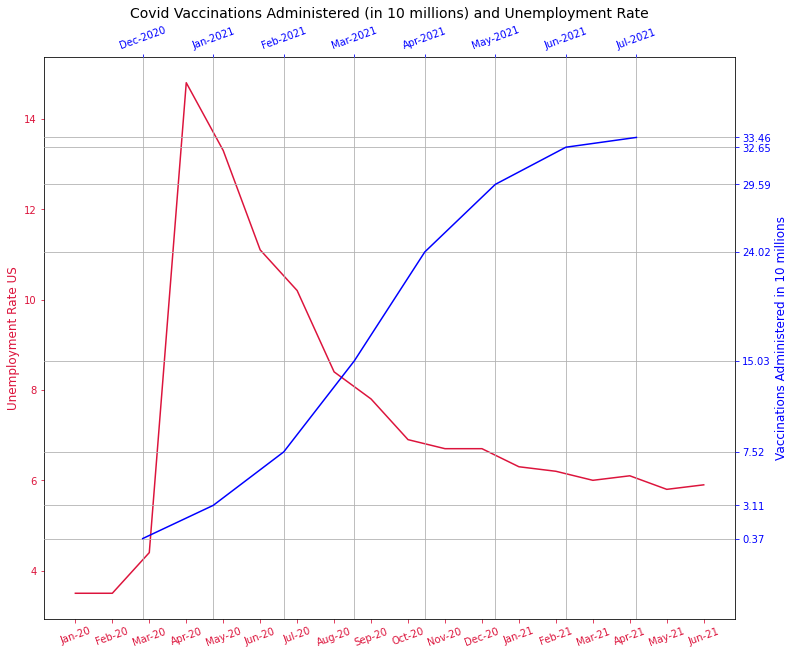

In [40]:
# Set two different size x-axis and two different y-axis on 1 plot.
# Please find specifications for the .subplots parameters at:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

# Unemployment rate plot
ax.plot(x_axis2,y_axis2, color="crimson")
ax.set_xlabel("", color="crimson")
ax.set_ylabel("Unemployment Rate US", fontsize=12, color="crimson")
ax.tick_params(axis='x', colors="crimson")
ax.tick_params(axis='y', colors="crimson")
ax.set_xticks(x_axis2)
ax.set_xticklabels(x_axis2, fontsize=10, rotation="20")
#ax.set_yticks(np.linspace(3,16,15))

# Spacing tweaked to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Plot the vaccinations administered in terms of 10 millions
fig.subplots_adjust(bottom=0.1, left=0.1)
ax2.plot(x_axis1,y_axis1,color="blue")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('', color="blue") 
ax2.set_ylabel('Vaccinations Administered in 10 millions', fontsize=12, color="blue")       
ax2.yaxis.set_label_position('right') 

ax2.xaxis.set_label_position('top') 
ax2.tick_params(axis='x', colors="blue")
ax2.tick_params(axis='y', colors="blue")
ax2.set_xticklabels(x_axis1, fontsize=10, rotation="20")
ax2.set_yticks(y_axis1)

plt.title("Covid Vaccinations Administered (in 10 millions) and Unemployment Rate", fontsize=14)
plt.grid()
plt.savefig("Images/BCP/Vaccinations Administered and Unemployment Rates line graph in US.png")
plt.show()

#### Scatter Plot and correlation
Let's get the x-axis and y-axis values for the scatter plot so we can do a correlation on
the number of vaccinations administered (in 10 millions) versus unemployment in the US.

To do a scatter plot the number of elements in the x-axis and y-axis must be equivalent.
Vaccinations administered data was only available from December 2020 through July 2021. For unemployment
numbers were available from January 2020 through June 2021 so we need to "throw out" some members of our
data set. That means keeping data from December 2020 through June 2021 and discarding the other data elements.

In [41]:
# The vaccinations administered December 2020 - June 2021
# us_location numbers in 10 millions after another division of 10.
vaccs = us_location.loc[us_location["yyyy-mm"] < "2021/07"] 
vaccs_axis = vaccs["Covid_Vacs_Administered (in millions)"]/10
vaccs_axis

440     0.374
441     3.112
442     7.524
443    15.027
444    24.016
445    29.589
446    32.652
Name: Covid_Vacs_Administered (in millions), dtype: float64

In [42]:
# Use only unemployment rates for December 2020 - June 2021
unemp_axis = unempl_us["Unemployment Rate US"].loc[11:17]
unemp_axis

11    6.7
12    6.3
13    6.2
14    6.0
15    6.1
16    5.8
17    5.9
Name: Unemployment Rate US, dtype: float64

###### Although the x-axis and y-axis data has been collected for the scatter plot we need to use that data for a different graph giving us a macro-level view of unemployment rate vs. vaccinations administered from December 2020 - June 2021.

A closer look at unemployment rate versus vaccination rates for December 2020 - June 2021. The graph below represents a closer look at unemployment rate versus vaccinations administered. In this case only data from December 2020 through June 2021 was used to give us a magnified view of a crucial period when vaccinations started being administered and how unemployment was affected. 

On the upper right-hand side I added in annotation to give a sense of what the number of jobs grew/reduced for each month as small percentage in changes to unemployment rates might not seem like much. Also the annotation above the vaccines (x-axis) lets you know which month it is associated with. For example, the difference in number of jobs added between January 21 and March 2021 was approximately 1.12 million additions and difference between April 2021 - May 2021 was an addition of approximately 940K. So although these may look like insignificant reductions in unemployment rate the difference can account for a lot of job additions.

In some cases the difference between December 2020 and January 2021 actually lost about 700K jobs but shows a reduction of unemployment rate. Part of this may be employees no longer being considered as unemployeed because of a voluntary decision not to return to work. The plot shows in general that as vaccinations increased so did the rate of unemployment. There was a slight rate of unemployment increasing from 6.0 to 6.1 percent between March 2021 and April 2021 even though the jobs increased by approximately 800K. From May 2021 to June 2021 there was an increase of about 580K jobs but the unemployment rate jumped from 5.8 to 5.9 percent.


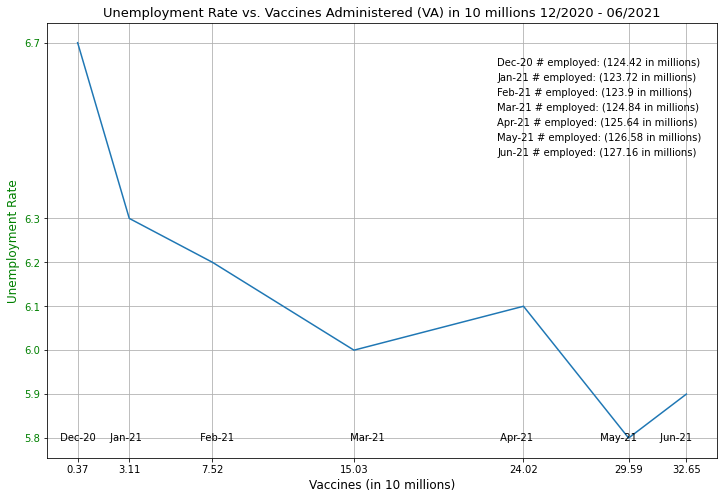

In [43]:
# Look at December 2020 - June 2021 data elements for vaccs administered and unemployment rates
# Let us look more closely at the unemployment vs. vaccines administered for that time period.

fig = plt.figure(figsize=(12,8))

plt.plot(vaccs_axis,unemp_axis)
plt.title("Unemployment Rate vs. Vaccines Administered (VA) in 10 millions 12/2020 - 06/2021",fontsize=13)
plt.ylabel("Unemployment Rate", fontsize=12, color="green")
plt.yticks(unemp_axis)
plt.yticks(color="green")
plt.xlabel("Vaccines (in 10 millions)",fontsize=12)
plt.xticks(vaccs_axis)

# Annotate the vaccinations administered in 10 millions in the US
plt.annotate(' Dec-20', (0,0), (10, 25),xycoords='axes fraction', textcoords='offset points', va='top')
#plt.annotate('(.374 VA)', (0,0), (10, 15),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate(' Jan-21', (0,0), (60, 25),xycoords='axes fraction', textcoords='offset points', va='top')
#plt.annotate('(3.112 VA)', (0,0), (60, 15),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate(' Feb-21', (0,0), (150, 25),xycoords='axes fraction', textcoords='offset points', va='top')
#plt.annotate('(7.524 VA)', (0,0), (150, 15),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate(' Mar-21', (0,0), (300, 25),xycoords='axes fraction', textcoords='offset points', va='top')
#plt.annotate('(15.027 VA)', (0,0), (300, 15),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate(' Apr-21', (0,0), (450, 25),xycoords='axes fraction', textcoords='offset points', va='top')
#plt.annotate('(24.016 VA)', (0,0), (450, 15),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate(' May-21', (0,0), (550, 25),xycoords='axes fraction', textcoords='offset points', va='top')
#plt.annotate('(29.589 VA)', (0,0), (530, 15),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate(' Jun-21', (0,0), (610, 25),xycoords='axes fraction', textcoords='offset points', va='top')
#plt.annotate('(32.652 VA)', (0,0), (610, 15),xycoords='axes fraction', textcoords='offset points', va='top')

# Annotate the number of employed in the US
plt.annotate('Dec-20 # employed: (124.42 in millions)', (0,0), (450, 400),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Jan-21 # employed: (123.72 in millions)', (0,0), (450, 385),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Feb-21 # employed: (123.9 in millions)', (0,0), (450, 370),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Mar-21 # employed: (124.84 in millions)', (0,0), (450, 355),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Apr-21 # employed: (125.64 in millions)', (0,0), (450, 340),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('May-21 # employed: (126.58 in millions)', (0,0), (450, 325),xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Jun-21 # employed: (127.16 in millions)', (0,0), (450, 310),xycoords='axes fraction', textcoords='offset points', va='top')

plt.grid()
plt.savefig("Images/BCP/Unemployment Rates vs. Vaccines Administered Dec-2020 - June 2021 in US.png")
plt.show()

##### Create the scatter plot and compute the Pearson correlation coefficient between "Unemployment Rates" and "Vaccines Administered"
A negative or inverse correlation describes a relationship between two variables that move in opposing directions. Or you can think of this as one variable increases (vaccines administered), then the value of the other variable (unemployment rates) decreases. In this case, as more Covid vaccinations were administered there was a decrease in the unemployment rate. 
 
The correlation coefficient can range from -1 to +1. A correlation coefficient with an absolute value of .75 is considered a strong relationship. The correlation coefficient computed for this comparison was -.86  which is a very strong indicator that there is a relationship between these two variables.

Remember correlation does not imply causality even if there is a strong correlation between the two variables! The correlation coefficient simply represents the degree of association between two sets of measurements. 

The correlation between both factors is -0.86


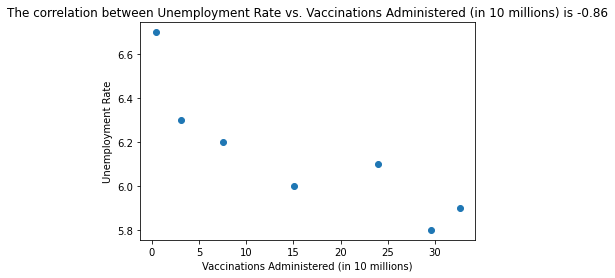

In [44]:
# The scatter plot
plt.scatter(vaccs_axis,unemp_axis)
plt.ylabel("Unemployment Rate")
plt.xlabel("Vaccinations Administered (in 10 millions)")

# Compute the Pearson correlation coefficient between unemployment rates 
# and "Vaccines Administered"

correlation = st.pearsonr(vaccs_axis, unemp_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.title(f"The correlation between Unemployment Rate vs. Vaccinations Administered (in 10 millions) is {round(correlation[0],2)}")
plt.savefig("Images/BCP/Scatter Plot Unemployment Rates vs. Vaccinations Administered (in millions).png", bbox_inches = "tight")
plt.show()

##### Calculate and show the linear regression equation and line to plot.
The mathematical formula is composed of a response variable (y), in this case the unemployment rate, and the predictor variable (x) or the vaccinations administered. The formula predicts in this case unemployment rate, when vaccinations administered values are known.

Simply put an R-squared indicates a measure of how close the data is to the fitted regression line. R-squared is the square of the Pearson's correlation coefficient. In the above graph, Pearson's correlation coefficient was calculated as (-.86) so the expected R-squared value would be .7496 approximately.

In general, higher R-squared values represent smaller differences between the observed and fitted values. In this analysis the R-squared was 0.75 indicating a fairly strong relationship. The p-value obtained here is 0.0120998 which is well below the standard <.05. If we obtained a large p-value, it would suggest that changes in the predictor (vaccinations administered) are not associated with changes in the response (unemployment rate). However, in this case the small p-value equates to changes in the predictor value (vaccinations administered) are related to changes in the response variable (unemployment rates). 

The r-squared is: 0.7469698787763827
The line is described as: y = -0.02x + 6.46
The pvalue is: 0.012099815814797394
The stderr is: 0.0051897377884630854


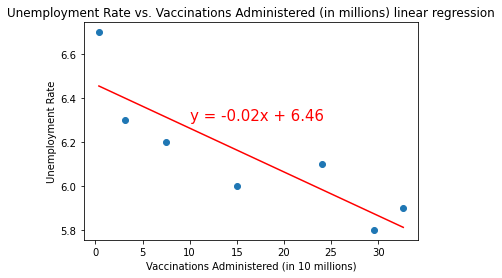

In [45]:
# Calculate and show the linear regression equation and line to plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(vaccs_axis, unemp_axis)
regress_values = vaccs_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(vaccs_axis, unemp_axis)
plt.plot(vaccs_axis,regress_values,"r-")
plt.annotate(line_eq,(10,6.3),fontsize=15,color="red")
plt.xlabel('Vaccinations Administered (in 10 millions)')
plt.ylabel('Unemployment Rate')
plt.title("Unemployment Rate vs. Vaccinations Administered (in millions) linear regression")
print(f"The r-squared is: {rvalue**2}")
print(f"The line is described as: {line_eq}")
print(f"The pvalue is: {pvalue}")
print(f"The stderr is: {stderr}")

plt.savefig("Images/BCP/Scatter Plot Unemployment Rates vs. Vaccinations (in millions) linear regression.png", bbox_inches = "tight")
plt.show()